In [1]:
#pip install opencv

In [2]:
#pip install opencv-python


In [3]:
import cv2

In [4]:
import numpy

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#pip install matplotlib


In [7]:
#pip install pytesseract

In [8]:
#pip install glob2

In [9]:
image = cv2.imread('6.jpeg')

In [10]:
image

array([[[ 41,  24,   3],
        [ 42,  25,   4],
        [ 45,  26,   5],
        ...,
        [ 93, 109, 125],
        [119, 135, 148],
        [115, 131, 144]],

       [[ 42,  25,   4],
        [ 43,  26,   5],
        [ 46,  27,   6],
        ...,
        [100, 114, 126],
        [128, 140, 152],
        [127, 139, 149]],

       [[ 36,  22,   0],
        [ 37,  23,   1],
        [ 40,  23,   2],
        ...,
        [ 99, 109, 116],
        [125, 133, 140],
        [129, 138, 142]],

       ...,

       [[ 77,  95, 102],
        [ 82, 100, 107],
        [108, 126, 133],
        ...,
        [101,  98,  94],
        [ 87,  84,  80],
        [114, 111, 107]],

       [[ 80,  99, 106],
        [ 91, 110, 117],
        [102, 120, 127],
        ...,
        [160, 157, 153],
        [147, 144, 140],
        [134, 131, 127]],

       [[ 76,  98, 104],
        [121, 143, 149],
        [116, 135, 142],
        ...,
        [140, 137, 133],
        [121, 118, 114],
        [115, 112, 108]]

In [11]:
cv2.imshow('Car', image)
cv2.waitKey(0)

-1

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
gray

array([[ 20,  21,  22, ..., 112, 137, 133],
       [ 21,  22,  23, ..., 116, 142, 141],
       [ 17,  18,  19, ..., 110, 134, 138],
       ...,
       [ 95, 100, 126, ...,  97,  83, 110],
       [ 99, 110, 120, ..., 156, 143, 130],
       [ 97, 142, 135, ..., 136, 117, 111]], dtype=uint8)

In [14]:
cv2.imshow('Gray Image', gray)
cv2.waitKey(0)

-1

In [15]:
def plot_images(img1, img2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = [15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap = "gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap = "gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    

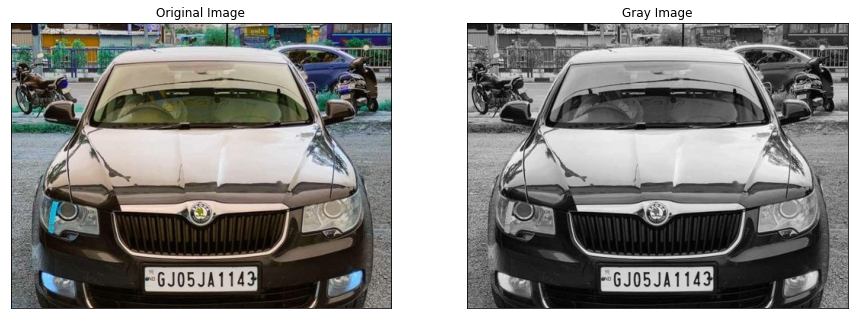

In [16]:
plot_images(image, gray, title1 = "Original Image", title2 = "Gray Image")

In [17]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

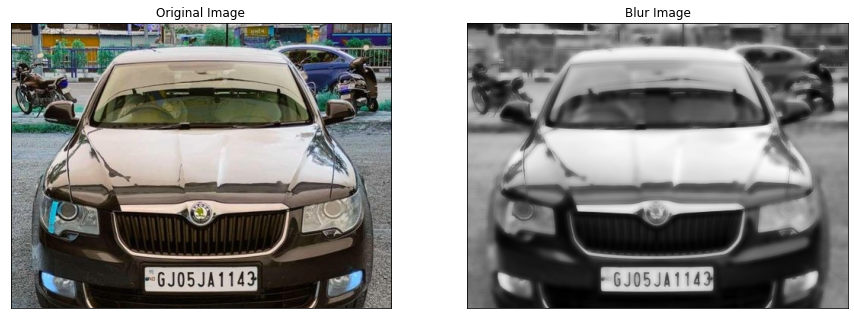

In [18]:
plot_images(image, blur, title1 = "Original Image", title2 = "Blur Image")

In [19]:
edges = cv2.Canny(blur, 30, 200)

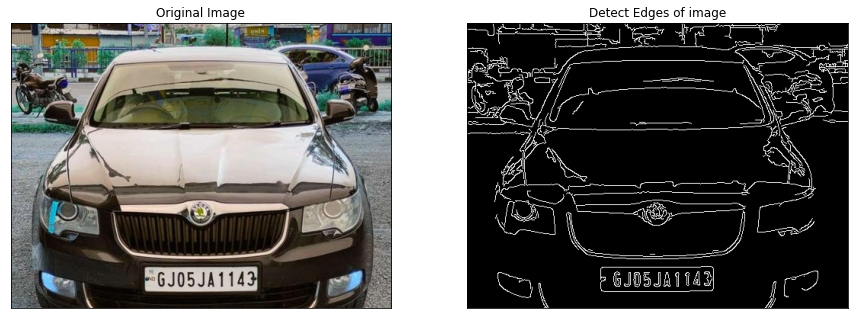

In [20]:
plot_images(image, edges, title1 = "Original Image", title2 = "Detect Edges of image")

In [21]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
image_copy = image.copy()

In [23]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)


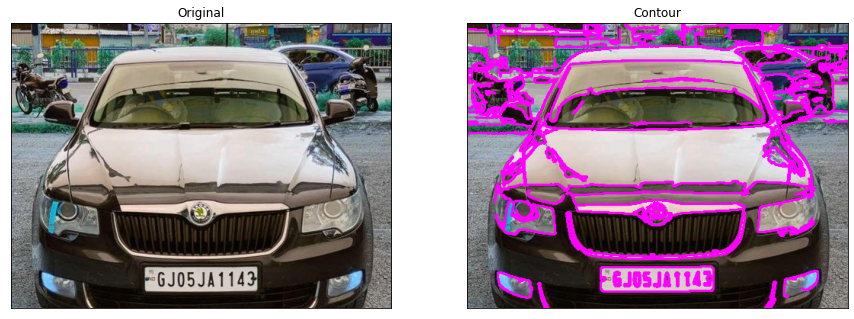

In [24]:
plot_images(image, image_copy, title1 = "Original", title2 = "Contour")

In [25]:
cnts = sorted(cnts, key=cv2.contourArea, reverse = True)[:30]

In [26]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

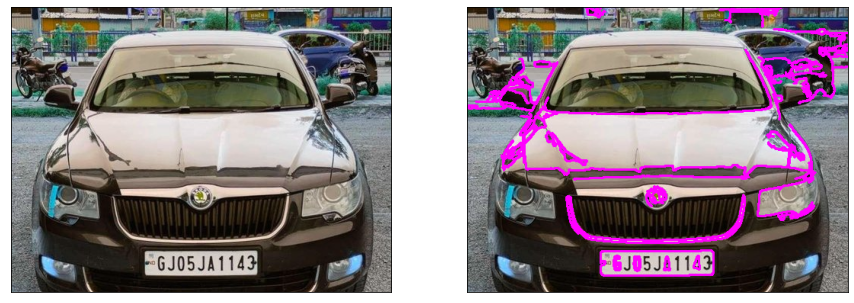

In [27]:
plot_images(image, image_copy)

In [28]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)



True

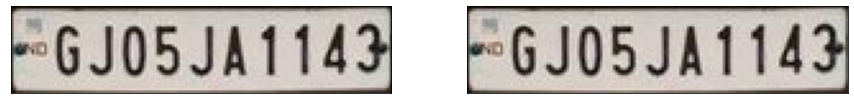

In [29]:
plot_images(plate,plate )

In [30]:
cv2.imshow('plate', plate)
cv2.waitKey(0)

-1

In [31]:
#pip install pytesseract
import pytesseract

In [32]:
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [33]:
txt = pytesseract.image_to_string(plate)

In [34]:
txt

'=-GJO5JA1 143\n\n'

In [35]:
import pickle

# Write to file.
file = open("data.pkl", "wb")
pickle.dump(image, file)
file.close()